In [968]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [969]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [970]:
#creando dataframe
dataframe = pd.read_csv('Trasplantes.csv')

//anaconda3/envs/sdc2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,4,8,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [971]:
#visualizando datos
dataframe['PACIENTE'] = range(1, len(dataframe) + 1)
dataframe.head()

,SEXO,CODIGO_SEXO,INSTITUCION,ENTIDAD_FEDERATIVA_TRASPLANTE,CODIGO_ENTIDAD_FEDERATIVA_TRASPLANTE,ESTABLECIMIENTO,INSTITUCION_ORGANO,ENTIDAD_FEDERATIVA_ORGANO,CODIGO_ENTIDAD_FEDERATIVA_ORGANO,ENTIDAD_FEDERATIVA_DE_ORIGEN,...,GRUPO_SANGUINEO_RECEPTOR,RH,EDAD_AL_TRASPLANTE_ANIOS,FECHA_REGISTRO_COMITE,FECHA_TRASPLANTE,ORGANO,TIPO_TRASPLANTE,RELACION,RESULTADO_24HRS,PACIENTE
0,MASCULINO,01,IMSS,JALISCO,14,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,SSE,COLIMA,14,NO DISPONIBLE,...,O,POSITIVO,26,2001-11-09,2009-08-31,RINON,CADAVER,NO APLICA,NO DISPONIBLE,1
1,MASCULINO,01,IMSS,JALISCO,14,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NO DISPONIBLE,...,B,POSITIVO,32,2001-11-07,2010-05-08,RINON,CADAVER,NO APLICA,NO DISPONIBLE,2
2,MASCULINO,01,IMSS,JALISCO,14,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,MICHOACAN,16,NO DISPONIBLE,...,O,POSITIVO,96,2002-02-15,2009-01-27,RINON,CADAVER,NO APLICA,NO DISPONIBLE,3
3,FEMENINO,02,IMSS,JALISCO,14,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,JALISCO,14,NO DISPONIBLE,...,B,POSITIVO,27,2002-02-19,2009-06-06,RINON,CADAVER,NO APLICA,NO DISPONIBLE,4
4,MASCULINO,01,IMSS,JALISCO,14,UNIDAD MEDICA DE ALTA ESPECIALIDAD HOSPITAL DE...,IMSS,SINALOA,25,NO DISPONIBLE,...,B,POSITIVO,24,2002-02-26,2007-07-25,RINON,CADAVER,NO APLICA,NO DISPONIBLE,5


In [972]:
dataframe.describe()

,CODIGO_ENTIDAD_FEDERATIVA_ORIGEN,PACIENTE
count,71847.000000,71848.000000
mean,22.486715,35924.500000
std,23.224574,20740.875407
min,1.000000,1.000000
25%,11.000000,17962.750000
50%,15.000000,35924.500000
75%,24.000000,53886.250000
max,99.000000,71848.000000


In [973]:
print(dataframe.groupby('ORGANO').size())

ORGANO
CORAZON             363
CORAZON-RINON         1
CORNEA            37756
EXTREMIDADES          6
HIGADO             1619
HIGADO-RINON          7
PANCREAS              7
PULMON               15
RINON             31930
RINON-PANCREAS       12
RINON-RINON         100
VALVULAS             29
dtype: int64


In [974]:
dataframe.dropna(inplace=True)

In [975]:
indexNames = dataframe[ (dataframe['RH'] == 'NO APLICA') | 
                        (dataframe['RH'] == 'NO DISPONIBLE') |
                        (dataframe['GRUPO_SANGUINEO_RECEPTOR'] == 'NO APLICA') | 
                        (dataframe['GRUPO_SANGUINEO_RECEPTOR'] == 'NO DISPONIBLE')|
                        (dataframe['FECHA_TRASPLANTE'] == 'NO DISPONIBLE')|
                        (dataframe['FECHA_TRASPLANTE'] == '')|
                        (dataframe['FECHA_REGISTRO_COMITE'] == '')|
                        (dataframe['RESULTADO_24HRS'] == 'NO DISPONIBLE')|
                        (dataframe['RESULTADO_24HRS'] == 'NO APLICA')].index
dataframe.drop(indexNames , inplace=True)

In [976]:
organs = {'CORAZON': 0, 'CORAZON-RINON':1, 'CORNEA':2, 'EXTREMIDADES':4, 'HIGADO':3,
    'HIGADO-RINON':1,'PANCREAS':5,'PULMON':6,'RINON':1,'RINON-PANCREAS':1,
    'RINON-RINON':1,'VALVULAS':7}
dataframe['ORGANO'] = dataframe['ORGANO'].apply(lambda x:organs[x])
dataframe['ORGANO'].head()

37366    1
37367    1
37368    1
37369    1
37370    1
Name: ORGANO, dtype: int64

In [977]:
print(dataframe.groupby('ORGANO').size())

ORGANO
1    22600
2     3397
3      101
dtype: int64


In [978]:
print(dataframe.groupby('INSTITUCION').size())

INSTITUCION
IMSS       13004
ISSSTE       674
PEMEX         46
PRIVADO     7436
SEDENA       335
SEMAR         92
SNTE          18
SSA         1712
SSE         2781
dtype: int64


In [979]:
institucion = {'IMSS': 1, 'ISSSTE':2, 'PEMEX':3, 'PRIVADO':4, 'SEDENA':5,
    'SEMAR':6,'SNTE':7,'SSA':8,'SSE':1}
dataframe['INSTITUCION'] = dataframe['INSTITUCION'].apply(lambda x:institucion[x])
dataframe['INSTITUCION'].head()

37366    8
37367    1
37368    3
37369    3
37370    1
Name: INSTITUCION, dtype: int64

In [980]:
print(dataframe.groupby('INSTITUCION').size())

INSTITUCION
1    15785
2      674
3       46
4     7436
5      335
6       92
7       18
8     1712
dtype: int64


In [981]:
print(dataframe.groupby('ENTIDAD_FEDERATIVA_TRASPLANTE').size())

ENTIDAD_FEDERATIVA_TRASPLANTE
AGUASCALIENTES         1148
BAJA CALIFORNIA         521
BAJA CALIFORNIA SUR     103
CAMPECHE                  2
CHIAPAS                 148
CHIHUAHUA               239
CIUDAD DE MEXICO       8749
COAHUILA               1355
COLIMA                    7
DURANGO                  10
GUANAJUATO             1153
GUERRERO                 10
HIDALGO                 270
JALISCO                4927
MEXICO                  586
MICHOACAN               359
MORELOS                 429
NAYARIT                  11
NUEVO LEON             1325
OAXACA                  176
PUEBLA                 1533
QUERETARO               330
QUINTANA ROO              6
SAN LUIS POTOSI         662
SINALOA                 106
SONORA                  317
TABASCO                 179
TAMAULIPAS               89
TLAXCALA                 59
VERACRUZ                903
YUCATAN                 348
ZACATECAS                38
dtype: int64


In [982]:
entidad = {'AGUASCALIENTES': 1, 'BAJA CALIFORNIA':2, 'BAJA CALIFORNIA SUR':3, 'CAMPECHE':4, 'CHIAPAS':5,
    'CHIHUAHUA':6,'CIUDAD DE MEXICO':7,'COAHUILA':8,'COLIMA':9,'DURANGO':10, 'GUANAJUATO':11,
    'GUERRERO':12, 'HIDALGO':13,'JALISCO':14, 'MEXICO':15,'MICHOACAN':16, 'MORELOS':17,'NAYARIT':18, 'NUEVO LEON':19,
    'OAXACA':20, 'PUEBLA':21,'QUERETARO':22, 'QUINTANA ROO':23, 'SAN LUIS POTOSI':24,'SINALOA':25, 'SONORA':26,
    'TABASCO':27,'TAMAULIPAS':28,'TLAXCALA':29, 'VERACRUZ':30,'YUCATAN':31, 'ZACATECAS':32}
dataframe['ENTIDAD_FEDERATIVA_TRASPLANTE'] = dataframe['ENTIDAD_FEDERATIVA_TRASPLANTE'].apply(lambda x:entidad[x])
dataframe['ENTIDAD_FEDERATIVA_TRASPLANTE'].head()

37366     7
37367    19
37368     7
37369     7
37370    14
Name: ENTIDAD_FEDERATIVA_TRASPLANTE, dtype: int64

In [983]:
print(dataframe.groupby('GRUPO_SANGUINEO_RECEPTOR').size())

GRUPO_SANGUINEO_RECEPTOR
A       5749
A1       158
A1B       12
A2        26
A2B        4
AB       319
B       2020
O      17810
dtype: int64


In [984]:
dataframe['GRUPO_SANGUINEO_RECEPTOR'] = dataframe[['GRUPO_SANGUINEO_RECEPTOR', 'RH']].apply(lambda x: ' '.join(x), axis = 1)
print(dataframe.groupby('GRUPO_SANGUINEO_RECEPTOR').size())

GRUPO_SANGUINEO_RECEPTOR
A NEGATIVO        206
A POSITIVO       5543
A1 NEGATIVO         5
A1 POSITIVO       153
A1B POSITIVO       12
A2 POSITIVO        26
A2B POSITIVO        4
AB NEGATIVO        15
AB POSITIVO       304
B NEGATIVO         54
B POSITIVO       1966
O NEGATIVO        390
O POSITIVO      17420
dtype: int64


In [985]:
sanguineo = {'A NEGATIVO': 1, 'A POSITIVO':2, 'A1 NEGATIVO':3, 'A1 POSITIVO':4, 'A1B POSITIVO':5,
    'A2 POSITIVO':6,'A2B POSITIVO':7,'AB NEGATIVO':8,'AB POSITIVO':9,'B NEGATIVO':10, 'B POSITIVO':11,
    'O NEGATIVO':12, 'O POSITIVO':13}
dataframe['GRUPO_SANGUINEO_RECEPTOR'] = dataframe['GRUPO_SANGUINEO_RECEPTOR'].apply(lambda x:sanguineo[x])
dataframe['GRUPO_SANGUINEO_RECEPTOR'].head()

37366    13
37367    13
37368    13
37369    13
37370    13
Name: GRUPO_SANGUINEO_RECEPTOR, dtype: int64

In [986]:
print(dataframe.groupby('RESULTADO_24HRS').size())

RESULTADO_24HRS
EXITOSO       25765
NO EXITOSO      333
dtype: int64


In [987]:
resultado = {'EXITOSO': 1, 'NO EXITOSO':2}
dataframe['RESULTADO_24HRS'] = dataframe['RESULTADO_24HRS'].apply(lambda x:resultado[x])
dataframe['RESULTADO_24HRS'].head()

37366    1
37367    1
37368    1
37369    1
37370    1
Name: RESULTADO_24HRS, dtype: int64

In [988]:
print(dataframe.groupby('RESULTADO_24HRS').size())

RESULTADO_24HRS
1    25765
2      333
dtype: int64


In [989]:
dataframe["TIEMPO_ESPERA"] = pd.to_datetime(dataframe['FECHA_TRASPLANTE']) - pd.to_datetime(dataframe['FECHA_REGISTRO_COMITE'])
dataframe["TIEMPO_ESPERA"] = (dataframe["TIEMPO_ESPERA"]).astype(int)

In [990]:
dataframe = dataframe.drop(['TIPO_TRASPLANTE','RELACION','FECHA_REGISTRO_COMITE','FECHA_TRASPLANTE','RH','CODIGO_ENTIDAD_FEDERATIVA_ORIGEN','CODIGO_ENTIDAD_FEDERATIVA_TRASPLANTE', 'SEXO','ESTABLECIMIENTO','ENTIDAD_FEDERATIVA_DE_ORIGEN',
               'ENTIDAD_FEDERATIVA_DE_RESIDENCIA','CODIGO_ENTIDAD_FEDERATIVA_RESIDENCIA','INSTITUCION_ORGANO',
               'ENTIDAD_FEDERATIVA_ORGANO','ESTABLECIMIENTO','CODIGO_SEXO','INSTITUCION_ORGANO','CODIGO_ENTIDAD_FEDERATIVA_ORGANO'], axis=1)

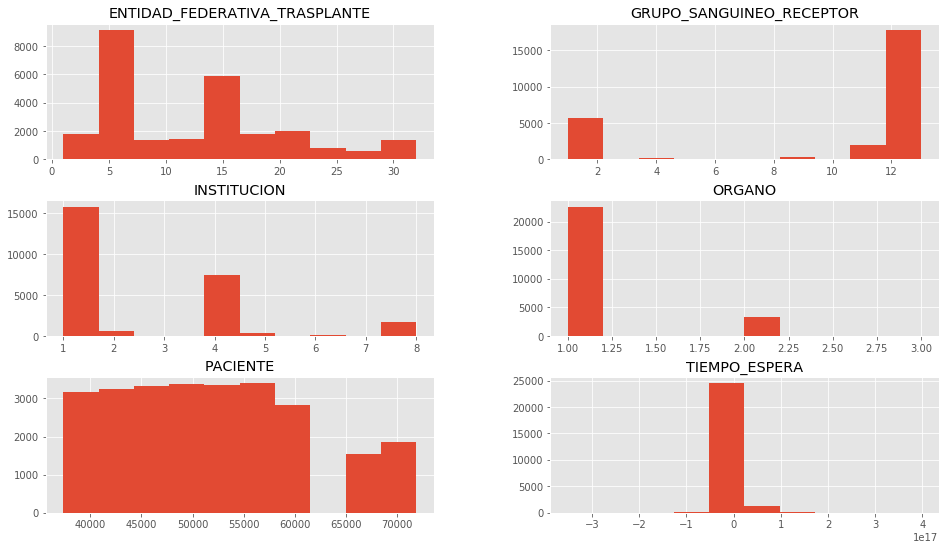

In [991]:
dataframe.drop(['RESULTADO_24HRS'],1).hist() 
plt.show()

//anaconda3/envs/sdc2/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


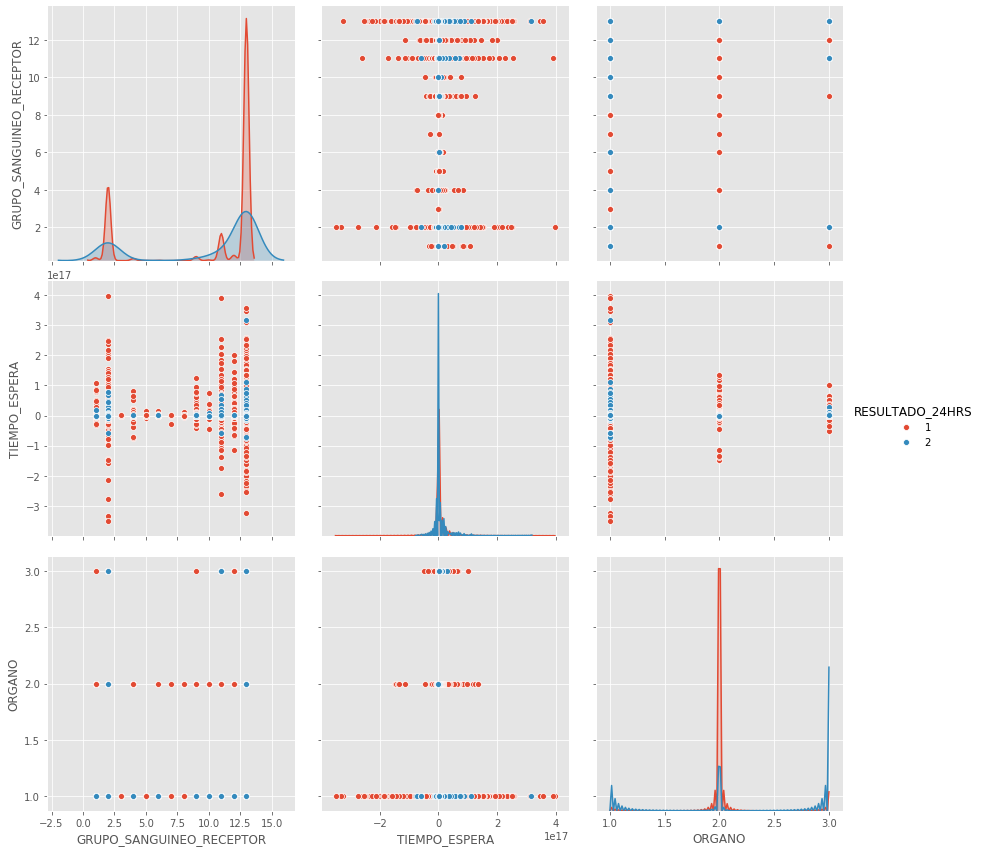

In [992]:
sb.pairplot(dataframe.dropna(), hue='RESULTADO_24HRS',size=4,vars=["GRUPO_SANGUINEO_RECEPTOR","TIEMPO_ESPERA","ORGANO"],kind='scatter')
plt.show()

In [993]:
X = np.array(dataframe[["GRUPO_SANGUINEO_RECEPTOR","TIEMPO_ESPERA","ORGANO"]])
y = np.array(dataframe['RESULTADO_24HRS'])
X.shape

(26098, 3)

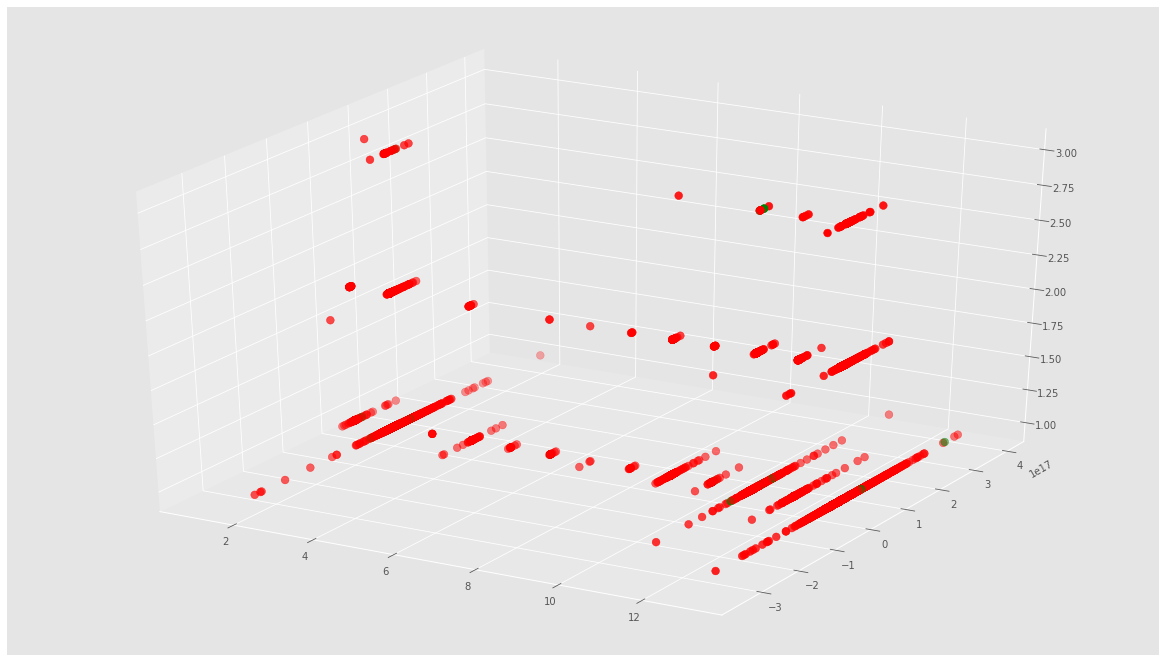

In [994]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','aqua','cyan','yellow','orange',
'black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
plt.show()

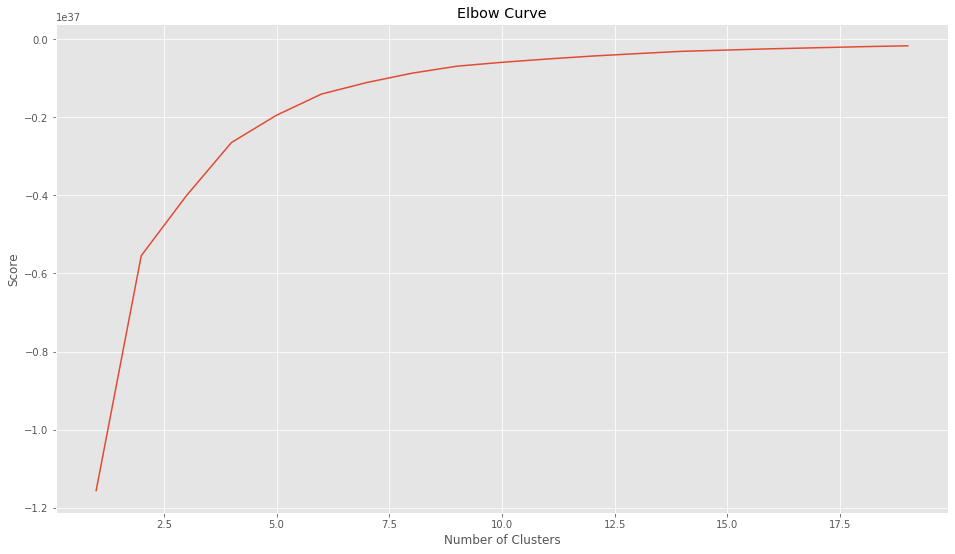

In [995]:
#obtener el valor de K
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [996]:
#ejecutamos Kmeans
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.02823306e+01 4.97257718e+14 1.13950172e+00]
 [1.02549941e+01 8.59867826e+16 1.09048179e+00]]


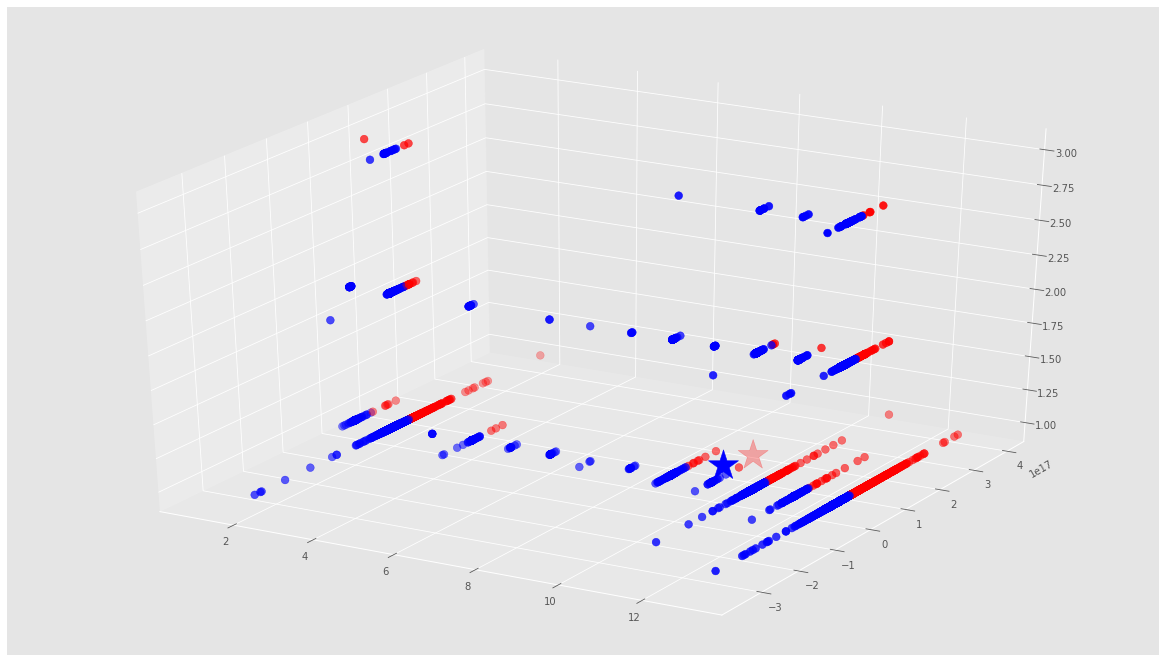

In [997]:
#viendo los grupos en 3D
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['blue','red']
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

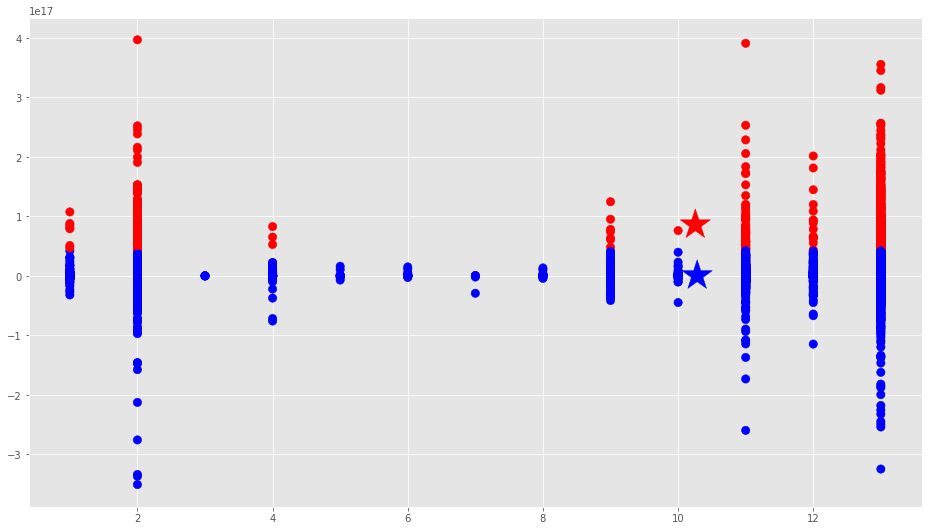

In [998]:
#viendo grupos en 2D para op y ex
#"GRUPO_SANGUINEO_RECEPTOR","TIEMPO_ESPERA","RESULTADO_24HRS"

f1 = dataframe['GRUPO_SANGUINEO_RECEPTOR'].values
f2 = dataframe['TIEMPO_ESPERA'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

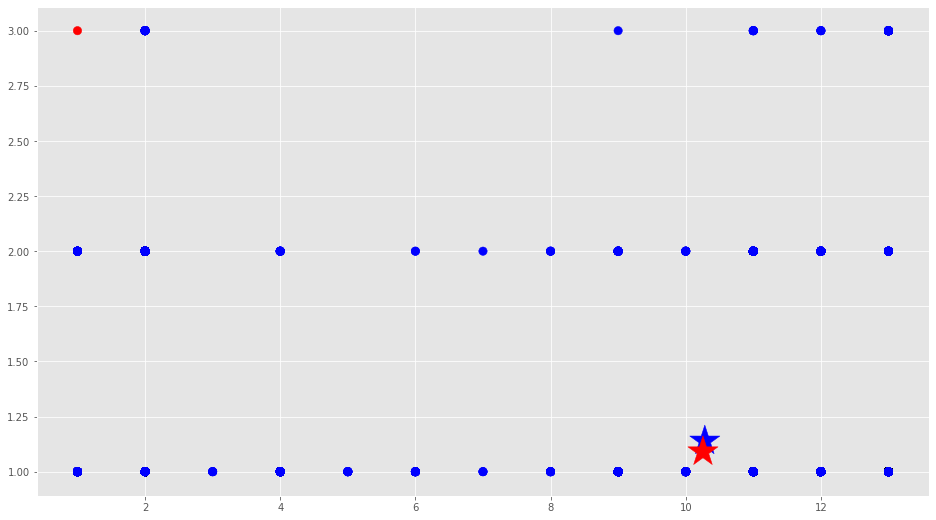

In [999]:
f1 = dataframe['GRUPO_SANGUINEO_RECEPTOR'].values
f2 = dataframe['ORGANO'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

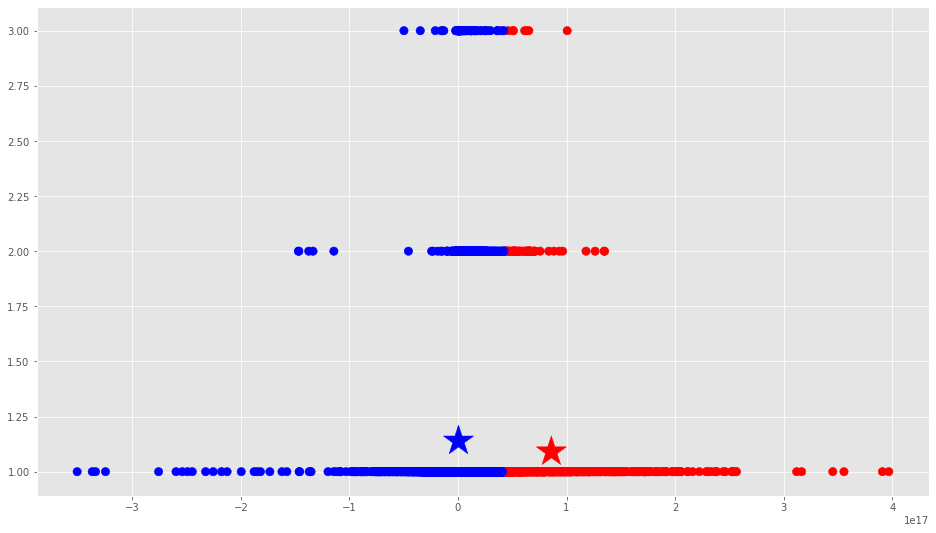

In [1000]:
f1 = dataframe['TIEMPO_ESPERA'].values
f2 = dataframe['ORGANO'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [1001]:
copy =  pd.DataFrame()
copy['PACIENTE']=dataframe['PACIENTE'].values
copy['RESULTADO_24HRS']=dataframe['RESULTADO_24HRS'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
print(cantidadGrupo)

  color  cantidad
0  blue     25247
1   red       851


In [1002]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['RESULTADO_24HRS']=[0,1,2]
diversidadGrupo['cantidad']=group_referrals.groupby('RESULTADO_24HRS').size()
print(diversidadGrupo)

   RESULTADO_24HRS  cantidad
0                0       NaN
1                1   24928.0
2                2     319.0


In [1004]:
#ver el paciente mas cercano al centroide
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
print(closest)
users=dataframe['PACIENTE'].values
for row in closest:
    print(users[row])

[  398 12939]
37788
50974


In [1005]:
export_excel = dataframe.to_excel (r'/Users/rbuenfil/Documents/export_dataframe.xlsx', index = None, header=True) #Don't forget to add '.xlsx' at the end of the path

In [1006]:
X = np.array(dataframe.drop(['RESULTADO_24HRS','PACIENTE'],1))
y = np.array(dataframe['RESULTADO_24HRS'])
X.shape

(26098, 6)

In [1007]:
model = linear_model.LogisticRegression() 
model.fit(X,y)

//anaconda3/envs/sdc2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [1008]:
predictions = model.predict(X) 
print(predictions[0:5])

[1 1 1 1 1]


In [962]:
model.score(X,y)

0.6456433443175722

In [963]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [964]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed) 
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
print(msg)

Logistic Regression: 0.642015 (0.013054)


//anaconda3/envs/sdc2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/sdc2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/sdc2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/sdc2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/sdc2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

In [965]:
predictions = model.predict(X_validation) 
print(accuracy_score(Y_validation, predictions))

0.6601532567049808


In [966]:
print(confusion_matrix(Y_validation, predictions))

[[3411 1738]
 [  36   35]]


In [967]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           1       0.99      0.66      0.79      5149
           2       0.02      0.49      0.04        71

    accuracy                           0.66      5220
   macro avg       0.50      0.58      0.42      5220
weighted avg       0.98      0.66      0.78      5220

